In [1]:



import pandas as pd
from sqlalchemy import create_engine

import sys
sys.path.append('../')
from src.user_behavior import aggregate_user_behavior
from src.preprocessing import replace_missing
from src.telecom_analysis import identify_top_handsets, identify_top_manufacturers, identify_top_handsets_per_manufacturer, generate_recommendations
from src.eda_telecom import describe_variables, analyze_basic_metrics, non_graphical_univariate_analysis, graphical_univariate_analysis, bivariate_analysis, variable_transformations, correlation_analysis, dimensionality_reduction    
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import describe




In [2]:
database_name = 'processed_telecom'
table_name= 'xdr_data'

connection_params = { "host": "localhost", "user": "postgres", "password": "00000000",
                    "port": "5432", "database": database_name}

engine = create_engine(f"postgresql+psycopg2://{connection_params['user']}:{connection_params['password']}@{connection_params['host']}:{connection_params['port']}/{connection_params['database']}")

# str or SQLAlchemy Selectable (select or text object)
sql_query = 'SELECT * FROM xdr_data '

df = pd.read_sql(sql_query, con= engine)


In [ ]:
df

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

In [ ]:
df.nunique()

In [ ]:
# Preprocess the dataset
df = replace_missing(df)
df

In [ ]:
# Identify the top 10 handsets
top_handsets = identify_top_handsets(df)
print("Top 10 Handsets:")
print(top_handsets)

In [ ]:
# Identify the top 3 handset manufacturers
top_manufacturers = identify_top_manufacturers(df)
print("\nTop 3 Handset Manufacturers:")
print(top_manufacturers)


In [ ]:
# Identify the top 5 handsets per top 3 handset manufacturer
top_handsets_per_manufacturer = identify_top_handsets_per_manufacturer(df)
print("\nTop 5 Handsets per Top 3 Handset Manufacturers:")
print(top_handsets_per_manufacturer)

In [ ]:
user_behavior_agg = aggregate_user_behavior(df)

# Display the aggregated user behavior information
user_behavior_agg.head()

In [3]:
# Describe relevant variables and data types (Slide)
print("Variables and Data Types:")
print(describe_variables(df))
variables = df.columns.tolist()
data_types = df.dtypes
print("Variables and Data Types:")
for var, dtype in zip(variables, data_types):
    print(f"{var}: {dtype}")

Variables and Data Types:
{'Bearer Id': dtype('float64'), 'Start': dtype('O'), 'Start ms': dtype('float64'), 'End': dtype('O'), 'End ms': dtype('float64'), 'Dur. (ms)': dtype('float64'), 'IMSI': dtype('float64'), 'MSISDN/Number': dtype('float64'), 'IMEI': dtype('float64'), 'Last Location Name': dtype('O'), 'Avg RTT DL (ms)': dtype('float64'), 'Avg RTT UL (ms)': dtype('float64'), 'Avg Bearer TP DL (kbps)': dtype('float64'), 'Avg Bearer TP UL (kbps)': dtype('float64'), 'TCP DL Retrans. Vol (Bytes)': dtype('float64'), 'TCP UL Retrans. Vol (Bytes)': dtype('float64'), 'DL TP < 50 Kbps (%)': dtype('float64'), '50 Kbps < DL TP < 250 Kbps (%)': dtype('float64'), '250 Kbps < DL TP < 1 Mbps (%)': dtype('float64'), 'DL TP > 1 Mbps (%)': dtype('float64'), 'UL TP < 10 Kbps (%)': dtype('float64'), '10 Kbps < UL TP < 50 Kbps (%)': dtype('float64'), '50 Kbps < UL TP < 300 Kbps (%)': dtype('float64'), 'UL TP > 300 Kbps (%)': dtype('float64'), 'HTTP DL (Bytes)': dtype('float64'), 'HTTP UL (Bytes)': dtyp

In [4]:
# Analyze basic metrics (Explanation)
print("\nBasic Metrics:")
print(analyze_basic_metrics(df))
basic_metrics = df.describe()
print("\nBasic Metrics:")
print(basic_metrics)


Basic Metrics:
          Bearer Id       Start ms         End ms      Dur. (ms)  \
count  1.500010e+05  150001.000000  150001.000000  150001.000000   
mean   1.013887e+19     499.188200     498.800880   92852.574377   
std    2.883600e+18     288.610872     288.096693   49348.957306   
min    6.917538e+18       0.000000       0.000000    7142.000000   
25%    7.349883e+18     250.000000     251.000000   57442.000000   
50%    7.349883e+18     499.000000     500.000000   86399.000000   
75%    1.304243e+19     749.000000     750.000000  116737.000000   
max    1.318654e+19     999.000000     999.000000  244900.000000   

               IMSI  MSISDN/Number          IMEI  Avg RTT DL (ms)  \
count  1.500010e+05   1.500010e+05  1.500010e+05    150001.000000   
mean   2.082016e+14   3.501433e+10  4.847455e+13        67.089326   
std    3.310759e+08   3.052711e+09  2.237359e+13        39.123157   
min    2.082009e+14   3.360171e+10  4.400152e+11         0.000000   
25%    2.082014e+14   3.36

In [ ]:
# Non-Graphical Univariate Analysis (Explanation)
print("\nDispersion Parameters:")
print(non_graphical_univariate_analysis(df))
dispersion_params = df.apply(describe, axis=1)
print("\nDispersion Parameters:")
print(dispersion_params)

In [ ]:
# Graphical Univariate Analysis (Explanation)
print(graphical_univariate_analysis(df))
quantitative_vars = df.select_dtypes(include=['float64']).columns
for var in quantitative_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[var], bins=20, kde=True)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# Bivariate Analysis (Explanation)
print(bivariate_analysis(df))
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Variable Transformations (Explanation)
print(variable_transformations(df))
df['Total Duration Decile'] = pd.qcut(df['Dur. (ms)'], q=10, labels=False)
total_data_per_decile = df.groupby('Total Duration Decile')['Total UL (Bytes)', 'Total DL (Bytes)'].sum()
print("\nTotal Data per Decile Class:")
print(total_data_per_decile)

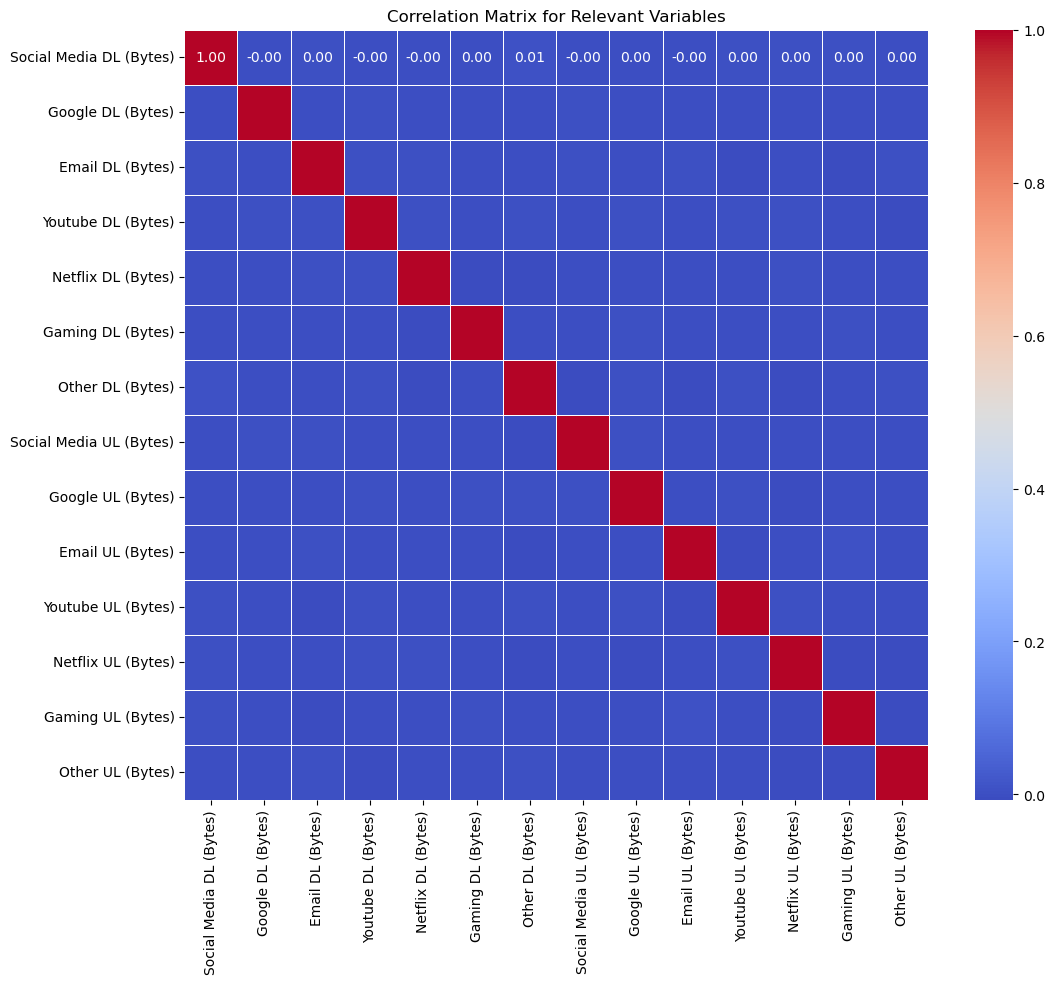

None


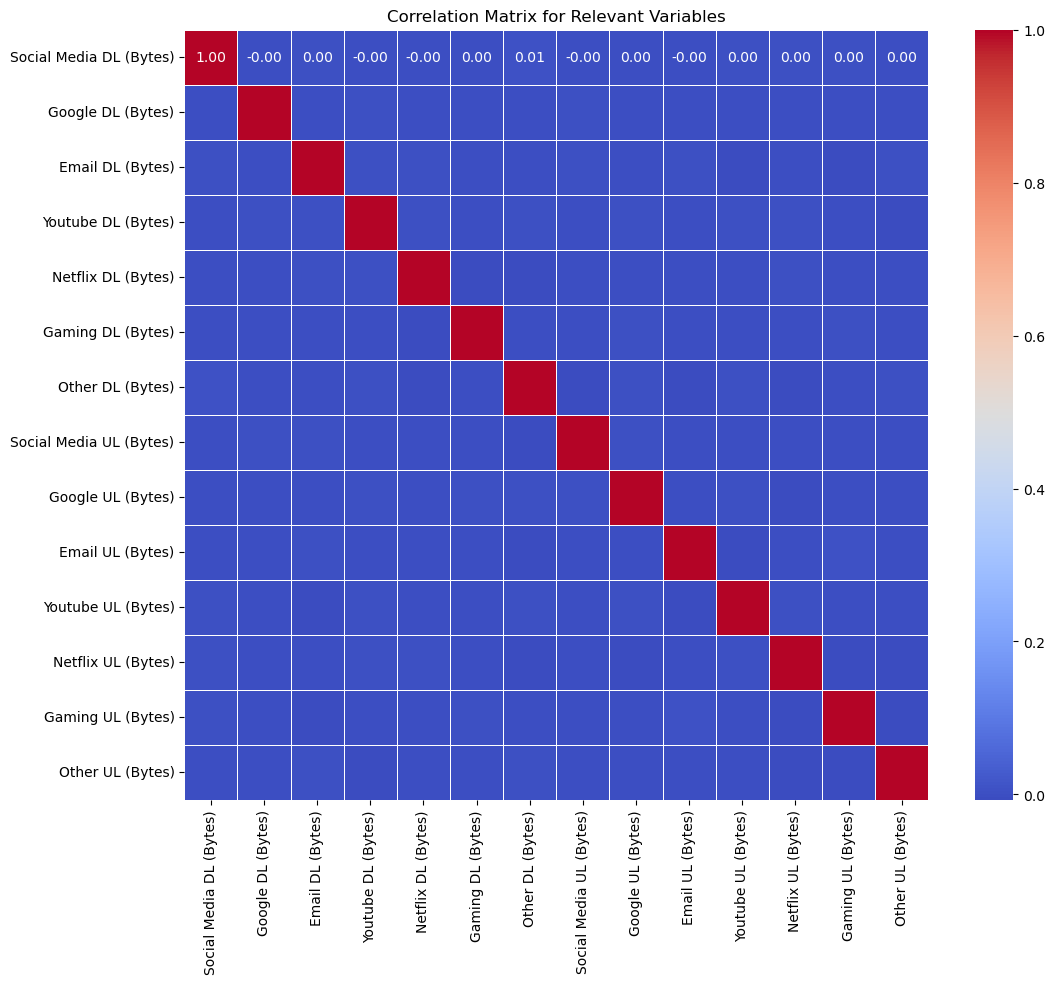

In [9]:
# Correlation Analysis (Explanation)
print(correlation_analysis(df))
relevant_vars = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)',
                 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)',
                 'Social Media UL (Bytes)', 'Google UL (Bytes)', 'Email UL (Bytes)', 'Youtube UL (Bytes)',
                 'Netflix UL (Bytes)', 'Gaming UL (Bytes)', 'Other UL (Bytes)']
correlation_matrix_relevant = df[relevant_vars].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_relevant, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Relevant Variables')
plt.show()

In [10]:
# Dimensionality Reduction (Explanation)
print(dimensionality_reduction (df))
X = df.dropna().select_dtypes(include=['float64'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_)

print("\nPrincipal Components:")
for i, component in enumerate(pca.components_):
    print(f"Principal Component {i+1}: {component}")

(array([[-2.90514651,  0.1499298 ],
       [-2.68508352,  0.37420729],
       [-2.58877629,  0.80698963],
       ...,
       [-3.00012261, -0.19330731],
       [-2.89301854,  0.10492033],
       [-2.65935582,  0.53124352]]), array([0.2549274 , 0.07715177]), array([[ 2.44656611e-02, -7.60427299e-04, -8.77492266e-05,
        -1.13138074e-01,  4.50642723e-03,  4.90952831e-03,
         1.15533589e-01,  3.12701338e-02,  9.66091348e-02,
         2.37300053e-01,  2.54737461e-01, -2.11238900e-01,
        -2.19763853e-01, -2.41427229e-01,  2.29494061e-01,
         2.41988642e-01,  2.19251982e-01, -2.61731517e-01,
         2.01519159e-01,  6.38949472e-02,  4.57304285e-02,
        -1.73622763e-01, -1.51712201e-01,  2.36721323e-01,
         2.40111333e-01, -1.13137819e-01, -1.97089720e-01,
        -1.84611761e-01, -1.74536167e-01, -2.93571403e-15,
        -1.35021794e-01,  5.55216600e-15,  2.34644920e-01,
         2.44055169e-01, -7.07904359e-04,  5.97106915e-04,
        -4.60525959e-04,  3.566756

In [11]:
# Plot PCA result

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Total Duration Decile'] = df.dropna()['Total Duration Decile']
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Total Duration Decile', palette='viridis')
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

KeyError: 'Total Duration Decile'